In [4]:
import sys
sys.path.append('../utils')  

from font import set_korean_font
set_korean_font()


🔵 문재인 정부의 2030 NDC
목표: 2030년까지 2018년 대비 40% 감축
산업부문 : 14.5%

🔴 윤석열 정부: 40% 감축 유지
산업 부문 감축률을 **14.5% → 11.4%**로 조정

🔴 박근혜 정부 : 
산업 부문 감축률을 12%

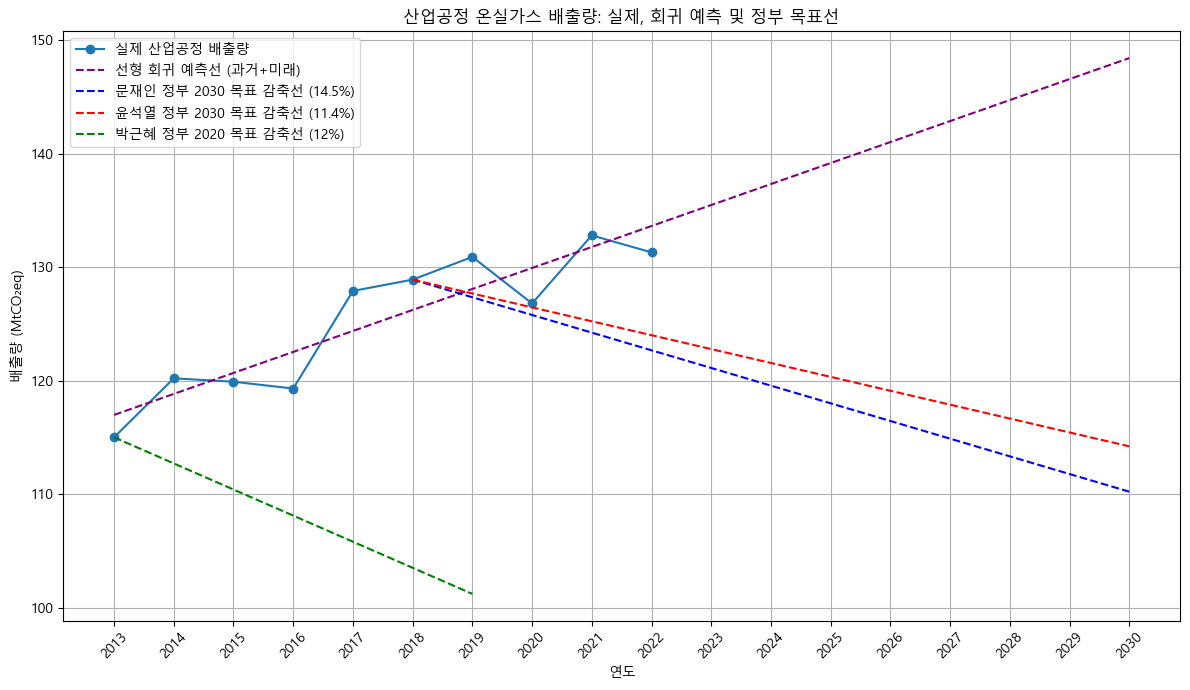

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 데이터 불러오기
df = pd.read_csv('../Data/국가_온실가스_배출현황.csv', index_col=0)

# 산업공정 데이터만 추출 및 float 변환
indust_emissions = df.loc['산업공정'].astype(float)

# 실제 연도 리스트 (정수형)
years = np.array(list(map(int, indust_emissions.index))).reshape(-1, 1)

# 배출량 (종속 변수)
emissions = indust_emissions.values

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(years, emissions)

# 미래 예측할 연도 범위 (예: 2019 ~ 2030)
future_years = np.arange(years.max() + 1, 2031).reshape(-1, 1)

# 전체 연도 (과거+미래)
all_years = np.vstack((years, future_years))

# 전체 기간에 대한 예측값
emissions_pred = model.predict(all_years)

# 정부 목표선 계산
emission_2018 = indust_emissions["2018"]
emission_2012 = indust_emissions["2013"]

moon_target_2030 = emission_2018 * (1 - 0.145)  # 14.5% 감축
yoon_target_2030 = emission_2018 * (1 - 0.114)  # 11.4% 감축
park_target_2020 = emission_2012 * (1 - 0.12)   # 12% 감축

moon_years = np.arange(2018, 2031)
park_years = np.arange(2013, 2020)
moon_line = np.linspace(emission_2018, moon_target_2030, len(moon_years))
yoon_line = np.linspace(emission_2018, yoon_target_2030, len(moon_years))
park_line = np.linspace(emission_2012, park_target_2020, len(park_years))

# 그래프 그리기
plt.figure(figsize=(12, 7))

# 실제 데이터 (연도별)
plt.plot(years.flatten(), emissions, 'o-', label='실제 산업공정 배출량')

# 선형 회귀 예측선 (과거+미래)
plt.plot(all_years.flatten(), emissions_pred, 'purple', linestyle='--', label='선형 회귀 예측선 (과거+미래)')

# 정부 목표선
plt.plot(moon_years, moon_line, 'b--', label='문재인 정부 2030 목표 감축선 (14.5%)')
plt.plot(moon_years, yoon_line, 'r--', label='윤석열 정부 2030 목표 감축선 (11.4%)')
plt.plot(park_years, park_line, 'g--', label='박근혜 정부 2020 목표 감축선 (12%)')

plt.title('산업공정 온실가스 배출량: 실제, 회귀 예측 및 정부 목표선')
plt.xlabel('연도')
plt.ylabel('배출량 (MtCO₂eq)')
plt.grid(True)
plt.legend()
plt.xticks(np.arange(years.min(), 2031), rotation=45)
plt.tight_layout()
plt.show()


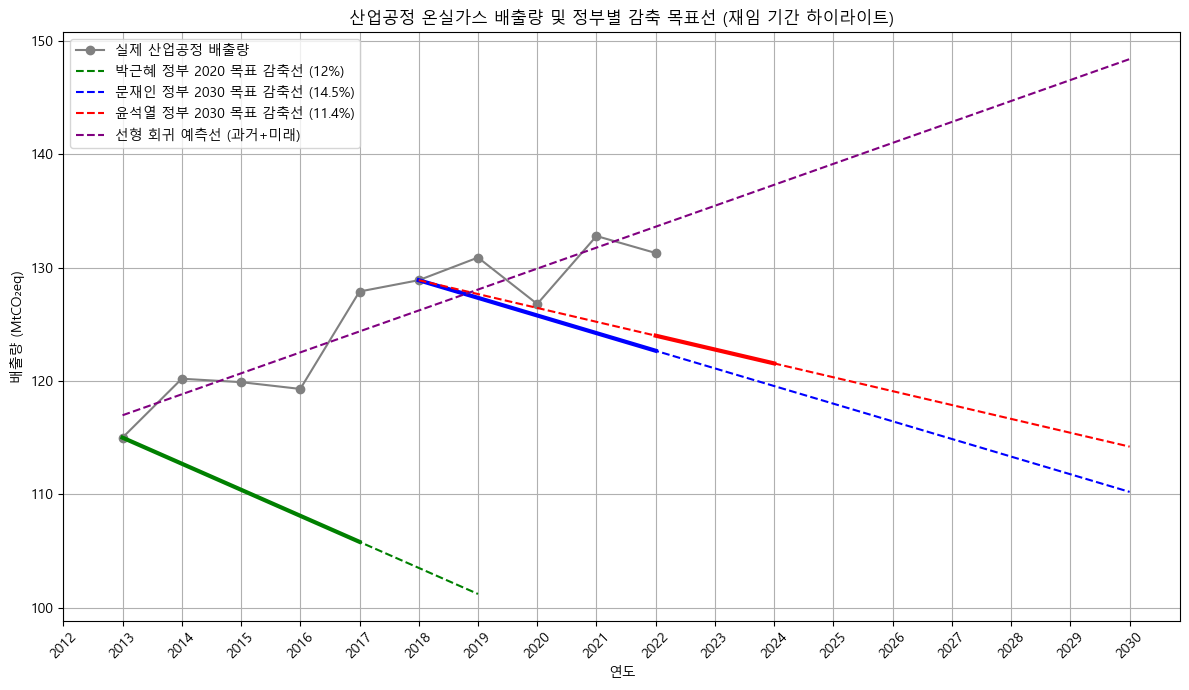

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 데이터 불러오기
df = pd.read_csv('../Data/국가_온실가스_배출현황.csv', index_col=0)

# 산업공정만 가져오기
indust_emissions = df.loc['산업공정'].astype(float)

# 실제 연도 리스트
years = np.array(list(map(int, indust_emissions.index))).reshape(-1, 1)


# 배출량 (종속 변수)
emissions = indust_emissions.values

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(years, emissions)

# 미래 예측할 연도 범위 (예: 2019 ~ 2030)
future_years = np.arange(years.max() + 1, 2031).reshape(-1, 1)

# 전체 연도 (과거+미래)
all_years = np.vstack((years, future_years))

# 전체 기간에 대한 예측값
emissions_pred = model.predict(all_years)

# 2018년 기준 배출량
emission_2018 = indust_emissions["2018"]
# 2012년 기준 배출량
emission_2012 = indust_emissions["2013"]

# 목표값 계산
moon_target_2030 = emission_2018 * (1 - 0.145)
yoon_target_2030 = emission_2018 * (1 - 0.114)
park_target_2020 = emission_2012 * (1 - 0.12)

# 목표선 연도 구간
moon_years = np.arange(2018, 2031)
park_years = np.arange(2013, 2020)

# 목표선 값
moon_line = np.linspace(emission_2018, moon_target_2030, len(moon_years))
yoon_line = np.linspace(emission_2018, yoon_target_2030, len(moon_years))
park_line = np.linspace(emission_2012, park_target_2020, len(park_years))

plt.figure(figsize=(12, 7))

# 실제 배출량
plt.plot(years, indust_emissions, marker='o', label='실제 산업공정 배출량', color='gray')

# 박근혜 정부 목표선 (전체 얇은 점선)
plt.plot(park_years, park_line, 'g--', label='박근혜 정부 2020 목표 감축선 (12%)')

# 박근혜 정부 재임 기간 (2013~2017) 굵은 선 강조 (부분)
park_reign_mask = (park_years >= 2013) & (park_years <= 2017)
plt.plot(park_years[park_reign_mask], park_line[park_reign_mask], color='green', linewidth=3)

# 문재인 정부 목표선 전체 얇은 파란 점선
plt.plot(moon_years, moon_line, 'b--', label='문재인 정부 2030 목표 감축선 (14.5%)')

# 문재인 정부 재임 기간 (2017~2022) 굵은 선 강조
moon_reign_mask = (moon_years >= 2017) & (moon_years <= 2022)
plt.plot(moon_years[moon_reign_mask], moon_line[moon_reign_mask], color='blue', linewidth=3)

# 윤석열 정부 목표선 전체 얇은 빨간 점선 (동일 기간 moon_years 사용)
plt.plot(moon_years, yoon_line, 'r--', label='윤석열 정부 2030 목표 감축선 (11.4%)')

# 윤석열 정부 재임 기간 (2022~2030) 굵은 선 강조
yoon_reign_mask = (moon_years >= 2022) & (moon_years <= 2024)
plt.plot(moon_years[yoon_reign_mask], yoon_line[yoon_reign_mask], color='red', linewidth=3)

# 선형 회귀 예측선 (과거+미래)
plt.plot(all_years.flatten(), emissions_pred, 'purple', linestyle='--', label='선형 회귀 예측선 (과거+미래)')

plt.title('산업공정 온실가스 배출량 및 정부별 감축 목표선 (재임 기간 하이라이트)')
plt.xlabel('연도')
plt.ylabel('배출량 (MtCO₂eq)')
plt.grid(True)
plt.legend()
plt.xticks(np.arange(2012, 2031), rotation=45)
plt.tight_layout()
plt.show()


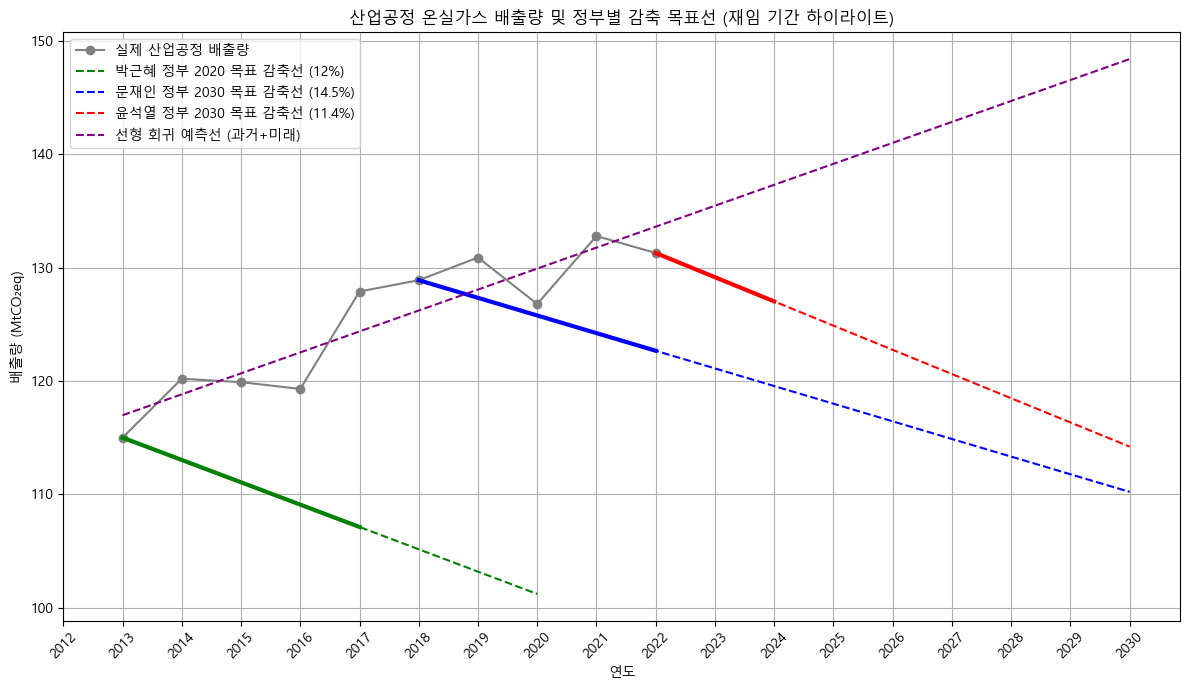

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 데이터 불러오기
df = pd.read_csv('../Data/국가_온실가스_배출현황.csv', index_col=0)

# 산업공정만 가져오기
indust_emissions = df.loc['산업공정'].astype(float)

# 실제 연도 리스트
years = np.array(list(map(int, indust_emissions.index))).reshape(-1, 1)

# 배출량 (종속 변수)
emissions = indust_emissions.values

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(years, emissions)

# 미래 예측할 연도 범위 (예: 2019 ~ 2030)
future_years = np.arange(years.max() + 1, 2031).reshape(-1, 1)

# 전체 연도 (과거+미래)
all_years = np.vstack((years, future_years))

# 전체 기간에 대한 예측값
emissions_pred = model.predict(all_years)

# 기준 배출량
emission_2018 = indust_emissions["2018"]
emission_2012 = indust_emissions["2013"]
emission_2022 = indust_emissions["2022"]

# 목표값 계산
moon_target_2030 = emission_2018 * (1 - 0.145)
yoon_target_2030 = emission_2018 * (1 - 0.114)
park_target_2020 = emission_2012 * (1 - 0.12)

# 목표선 연도 구간
moon_years = np.arange(2018, 2031)
park_years = np.arange(2013, 2021)

# 목표선 값
moon_line = np.linspace(emission_2018, moon_target_2030, len(moon_years))
park_line = np.linspace(emission_2012, park_target_2020, len(park_years))

plt.figure(figsize=(12, 7))

# 실제 배출량
plt.plot(years, indust_emissions, marker='o', label='실제 산업공정 배출량', color='gray')

# 박근혜 정부 목표선 (전체 얇은 점선)
plt.plot(park_years, park_line, 'g--', label='박근혜 정부 2020 목표 감축선 (12%)')

# 박근혜 정부 재임 기간 (2013~2017) 굵은 선 강조
park_reign_mask = (park_years >= 2013) & (park_years <= 2017)
plt.plot(park_years[park_reign_mask], park_line[park_reign_mask], color='green', linewidth=3)

# 문재인 정부 목표선 전체 얇은 파란 점선
plt.plot(moon_years, moon_line, 'b--', label='문재인 정부 2030 목표 감축선 (14.5%)')

# 문재인 정부 재임 기간 (2017~2022) 굵은 선 강조
moon_reign_mask = (moon_years >= 2017) & (moon_years <= 2022)
plt.plot(moon_years[moon_reign_mask], moon_line[moon_reign_mask], color='blue', linewidth=3)

# 윤석열 정부 목표선: 2022 실제값부터 2030 목표까지 직선
yoon_line_x = [2022, 2030]
yoon_line_y = [emission_2022, yoon_target_2030]

# 윤석열 정부 목표선 전체 얇은 빨간 점선
plt.plot(yoon_line_x, yoon_line_y, 'r--', label='윤석열 정부 2030 목표 감축선 (11.4%)')

# 윤석열 정부 재임 기간 (2022~2024) 굵은 선 강조
partial_x = [2022, 2024]
partial_y = [emission_2022,
             emission_2022 + (yoon_target_2030 - emission_2022) * ((2024 - 2022) / (2030 - 2022))]
plt.plot(partial_x, partial_y, color='red', linewidth=3)

# 선형 회귀 예측선 (과거+미래)
plt.plot(all_years.flatten(), emissions_pred, 'purple', linestyle='--', label='선형 회귀 예측선 (과거+미래)')

plt.title('산업공정 온실가스 배출량 및 정부별 감축 목표선 (재임 기간 하이라이트)')
plt.xlabel('연도')
plt.ylabel('배출량 (MtCO₂eq)')
plt.grid(True)
plt.legend()
plt.xticks(np.arange(2012, 2031), rotation=45)
plt.tight_layout()
plt.show()


## 📌 문재인 정부 에너지 정책 요약 → 분석 변수 변환

| 정책 요소              | 원문 요약                                                | 분석 적용 변수 (시뮬레이션 적용 방식)                                                                                                                                  |
|-----------------------|----------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 🌞 신재생 비중 20%     | 2030년까지 신재생에너지 발전 비중 20% 달성               | 🔸 **발전량 대비 신재생 계약량 비율**: `contract_ratio = 계약량 / 발전량` → **20%까지 증가 시 탄소 회피량 예측**                                                      |
| ⚡ 신재생공급의무비율 28% 확대 (RPS) | 2030년까지 RPS를 28%로 상향                        | 🔸 **계약량 28% 증가 시나리오** 구성                                                                                                                                |                                                                              |
| 🏭 태양광·풍력 확대     | 태양광·풍력 중심 확대                                    | 🔸 **태양광·풍력 비중 데이터** 존재 시 필터링 후 **세부 시나리오** 작성 가능                                                                                          |


## 📌 윤석열 정부 에너지 정책 요약 → 분석 변수 변환

| 정책 요소              | 원문 요약                                                | 분석 적용 변수 (시뮬레이션 적용 방식)                                                                                                                                  |
|-----------------------|----------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 🌞 신재생 비중 초기 30.2% 발표 --> 21.6%로 하향 조정     | 2030년까지 신재생에너지 발전 비중 20% 달성               | 🔸 **발전량 대비 신재생 계약량 비율**: `contract_ratio = 계약량 / 발전량` → **20%까지 증가 시 탄소 회피량 예측**                                                      |
| ⚡ 신재생공급의무비율 21.58%  (RPS) | 2030년까지 RPS를 %로 상향                        | 🔸 **계약량 28% 증가 시나리오** 구성                                                                                                                                |                                                                              |
| 🏭 태양광·풍력 축소     | 태양광·풍력 축소                               | 🔸 **태양광·풍력 비중 데이터** 존재 시 필터링 후 **세부 시나리오** 작성 가능                                                                                          |


## 📌 박근혜 정부 에너지 정책 요약 → 분석 변수 변환

| 정책 요소              | 원문 요약                                                | 분석 적용 변수 (시뮬레이션 적용 방식)                                                                                                                                  |
|-----------------------|----------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 🏭 태양광 공급 크게 확대     | 태양광 확대                            | 🔸 **태양광·풍력 비중 데이터** 존재 시 필터링 후 **세부 시나리오** 작성 가능                                                                                          |


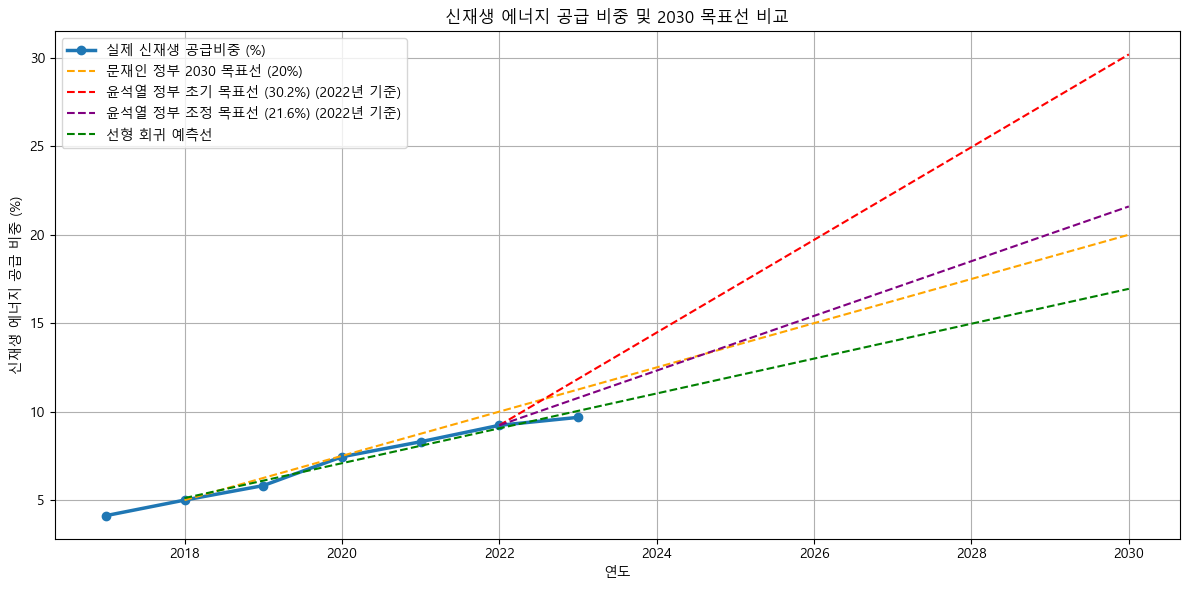

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 데이터 불러오기
renew_gen = pd.read_csv('../new data/연도별 자립도 분석(지역X).csv')

# 데이터 전처리
renew_gen['신재생에너지 공급비중'] = renew_gen['신재생에너지 공급비중'].astype(str).str.replace(',', '')
renew_gen['신재생에너지 공급비중'] = pd.to_numeric(renew_gen['신재생에너지 공급비중'], errors='coerce')
renew_gen = renew_gen.sort_values('연도')

# 기준 연도 및 값
base_year = 2018
base_value = renew_gen.loc[renew_gen['연도'] == base_year, '신재생에너지 공급비중'].values[0]

# 윤석열 정부 시작 연도 및 실제값
yoon_start_year = 2022
yoon_start_value = renew_gen.loc[renew_gen['연도'] == yoon_start_year, '신재생에너지 공급비중'].values[0]

# 목표 연도 및 목표값
target_year = 2030
years = list(range(base_year, target_year + 1))

# 목표값
moon_target_value = 20.0     # 문재인 정부 목표
yoon_initial_target = 30.2   # 윤석열 초기 목표
yoon_adjusted_target = 21.6  # 윤석열 조정 목표

# 선형 목표선 계산 함수
def linear_goal(start_year, end_year, start_val, end_val):
    return [start_val + (end_val - start_val) * (y - start_year) / (end_year - start_year) for y in range(start_year, end_year + 1)]

# 문재인 목표선 (2018 ~ 2030)
moon_line = linear_goal(base_year, target_year, base_value, moon_target_value)

# 윤석열 초기 및 조정 목표선 (2022 ~ 2030)
yoon_adjusted_years = list(range(yoon_start_year, target_year + 1))
yoon_initial_line = linear_goal(yoon_start_year, target_year, yoon_start_value, yoon_initial_target)
yoon_adjusted_line = linear_goal(yoon_start_year, target_year, yoon_start_value, yoon_adjusted_target)

# 선형 회귀 모델 학습
X = renew_gen['연도'].values.reshape(-1, 1)
y = renew_gen['신재생에너지 공급비중'].values
model = LinearRegression()
model.fit(X, y)

# 회귀 예측 (2018~2030)
predict_years = np.arange(base_year, target_year + 1).reshape(-1, 1)
predicted_values = model.predict(predict_years)

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 실제 데이터
plt.plot(renew_gen['연도'], renew_gen['신재생에너지 공급비중'], marker='o', linewidth=2.5, label='실제 신재생 공급비중 (%)')

# 정부 목표선
plt.plot(years, moon_line, '--', color='orange', label='문재인 정부 2030 목표선 (20%)')
plt.plot(yoon_adjusted_years, yoon_initial_line, '--', color='red', label='윤석열 정부 초기 목표선 (30.2%) (2022년 기준)')
plt.plot(yoon_adjusted_years, yoon_adjusted_line, '--', color='purple', label='윤석열 정부 조정 목표선 (21.6%) (2022년 기준)')

# 회귀선
plt.plot(predict_years.flatten(), predicted_values, linestyle='--', color='green', label='선형 회귀 예측선')

plt.xlabel('연도')
plt.ylabel('신재생 에너지 공급 비중 (%)')
plt.title('신재생 에너지 공급 비중 및 2030 목표선 비교')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


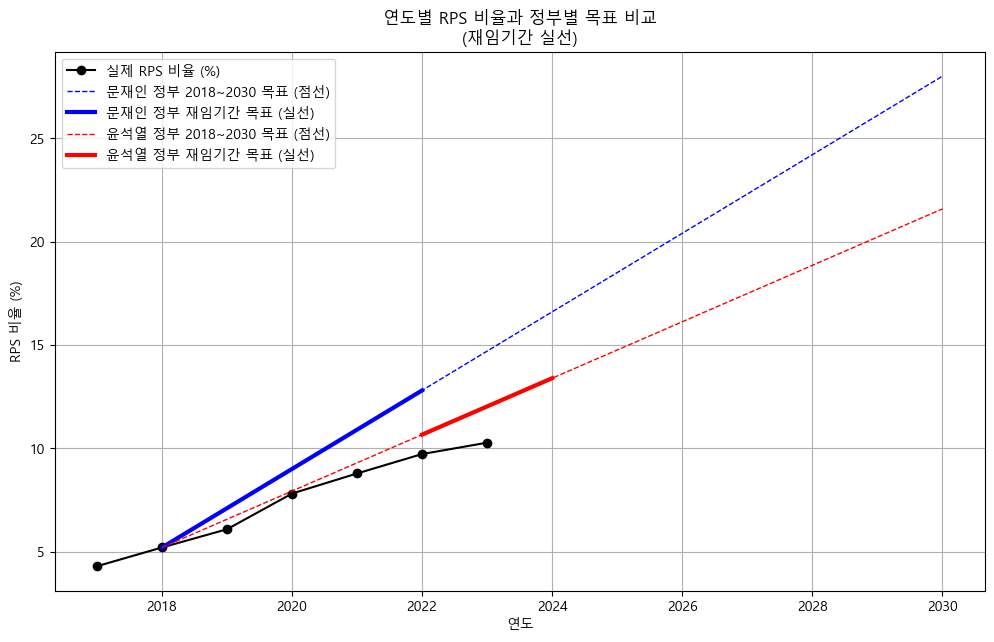

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기
renew_contract = pd.read_csv('../new data/신재생에너지_계약_현황_목록_전처리.csv')  # 신재생 계약량
renew_gen = pd.read_csv('../new data/연도별 자립도 분석(지역X).csv')  # 신재생 발전량
power_gen = pd.read_csv('../Data/HOME_발전·판매_발전량_지역별.csv', encoding='cp949')  # 전체 발전량

# 화석 포함 총 발전량 계산 
power_gen["화석포함총발전량"] = power_gen.drop(columns=["연도"]).sum(axis=1)
power_gen = power_gen[["연도", "화석포함총발전량"]]

# renew_gen에서 '신재생에너지 합계' 컬럼 추출
renew_gen = renew_gen[['연도', '신재생에너지 합계']]

# 전체 발전량과 신재생 발전량 병합
merged = pd.merge(power_gen, renew_gen, on='연도')

# RPS 비율 계산: (신재생 발전량 / 전체 발전량) * 100
merged['RPS_비율'] = (merged['신재생에너지 합계'] / merged['화석포함총발전량']) * 100

start_year = 2018
target_year = 2030
years_full = np.arange(start_year, target_year + 1)

# 2018년 실제 RPS 값
start_rps = merged.loc[merged['연도'] == start_year, 'RPS_비율'].values[0]

# 문재인 정부 목표선: 2018년부터 2030년까지 28%까지 선형 증가
moon_rps = np.linspace(start_rps, 28, len(years_full))
# 윤석열 정부 목표선: 2018년부터 2030년까지 21.58%까지 선형 증가
yoon_rps = np.linspace(start_rps, 21.58, len(years_full))

# 재임기간 정의
moon_term = (years_full >= 2017) & (years_full <= 2022)  # 문재인 재임기간
yoon_term = (years_full >= 2022) & (years_full <= 2024)  # 윤석열 재임기간

plt.figure(figsize=(12, 7))

# 실제 RPS 비율
plt.plot(merged['연도'], merged['RPS_비율'], marker='o', color='black', label='실제 RPS 비율 (%)')

# 문재인 정부 목표 전체 
plt.plot(years_full, moon_rps, color='blue', linestyle='--', linewidth=1, label='문재인 정부 2018~2030 목표 (점선)')

# 문재인 재임기간만 실선, 굵게
plt.plot(years_full[moon_term], moon_rps[moon_term], color='blue', linestyle='-', linewidth=3, label='문재인 정부 재임기간 목표 (실선)')

# 윤석열 정부 목표 전체
plt.plot(years_full, yoon_rps, color='red', linestyle='--', linewidth=1, label='윤석열 정부 2018~2030 목표 (점선)')

# 윤석열 재임기간만 실선, 굵게 
plt.plot(years_full[yoon_term], yoon_rps[yoon_term], color='red', linestyle='-', linewidth=3, label='윤석열 정부 재임기간 목표 (실선)')

plt.xlabel('연도')
plt.ylabel('RPS 비율 (%)')
plt.title('연도별 RPS 비율과 정부별 목표 비교\n(재임기간 실선)')
plt.legend()
plt.grid(True)
plt.show()


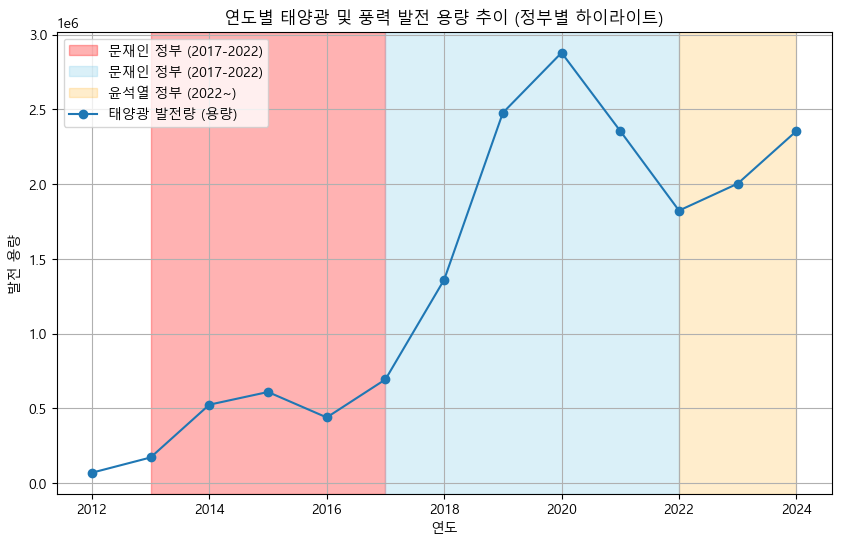

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 읽기
df = pd.read_csv('../new data/신재생에너지_계약_현황_목록_전처리.csv')

# '용량' 컬럼을 숫자형으로 변환 (혹시 쉼표가 있으면 제거)
df['용량'] = pd.to_numeric(df['용량'], errors='coerce')

# 태양광, 풍력 데이터만 필터링
df_filtered = df[df['발전원'].isin(['태양광'])]

# 연도와 발전원별 용량 합계 구하기
df_grouped = df_filtered.groupby(['연도', '발전원'])['용량'].sum().reset_index()

# 피벗 테이블 형태로 변경 (연도별 각 발전원 용량이 컬럼으로)
df_pivot = df_grouped.pivot(index='연도', columns='발전원', values='용량').fillna(0)

# 그래프 그리기
plt.figure(figsize=(10,6))

# 박근혜 시기 (2013~2017) 배경 색상 (파랑 계열)
plt.axvspan(2013, 2017, color='red', alpha=0.3, label='문재인 정부 (2017-2022)')

# 문재인 시기 (2017~2022) 배경 색상 (파랑 계열)
plt.axvspan(2017, 2022, color='skyblue', alpha=0.3, label='문재인 정부 (2017-2022)')

# 윤석열 시기 (2022~최신) 배경 색상 (주황 계열)
plt.axvspan(2022, df_pivot.index.max(), color='orange', alpha=0.2, label='윤석열 정부 (2022~)')

# 그래프 선 그리기
plt.plot(df_pivot.index, df_pivot['태양광'], label='태양광 발전량 (용량)', marker='o')

plt.xlabel('연도')
plt.ylabel('발전 용량')
plt.title('연도별 태양광 및 풍력 발전 용량 추이 (정부별 하이라이트)')
plt.legend()
plt.grid(True)

plt.show()


In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 데이터 불러오기
renew_contract = pd.read_csv('../new data/신재생에너지_계약_현황_목록_전처리.csv')  # 신재생 계약량
renew_gen = pd.read_csv('../new data/연도별 자립도 분석(지역X).csv') #신재생 에너지 발전량
power_gen = pd.read_csv('../Data/HOME_발전·판매_발전량_지역별.csv',encoding='cp949') #발전량

power_gen["화석포함총발전량"] = power_gen.drop(columns=["연도"]).sum(axis=1)
power_gen=power_gen[["연도", "화석포함총발전량"]]

# 연도 기준 병합
renew_contract['연도'] = renew_contract['연도'].astype(int)
renew_gen['연도'] = renew_gen['연도'].astype(int)

merged = pd.merge(renew_contract, renew_gen, on='연도')
merged = pd.merge(merged, power_gen, on='연도')
print(merged.columns)
print(merged['탄소회피량(톤)'])

Index(['발전원', '지역구분', '시도구분', '개수', '용량', '지역개수', '지역용량', '연도', '총발전량', '양수발전',
       '신재생에너지 공급비중', '재생에너지 공급비중', '신에너지 공급비중', '신재생에너지 합계', '재생에너지 합계',
       '신에너지 합계', '태양광', '풍력', '수력', '해양', '바이오', '재생폐기물', '연료전지', 'IGCC',
       '총합', '자립도(%)', '탄소회피량(톤)', '화석포함총발전량'],
      dtype='object')
0       25609.542760
1       25609.542760
2       25609.542760
3       25609.542760
4       25609.542760
            ...     
1661    10078.061512
1662    10078.061512
1663    10078.061512
1664    10078.061512
1665    10078.061512
Name: 탄소회피량(톤), Length: 1666, dtype: float64


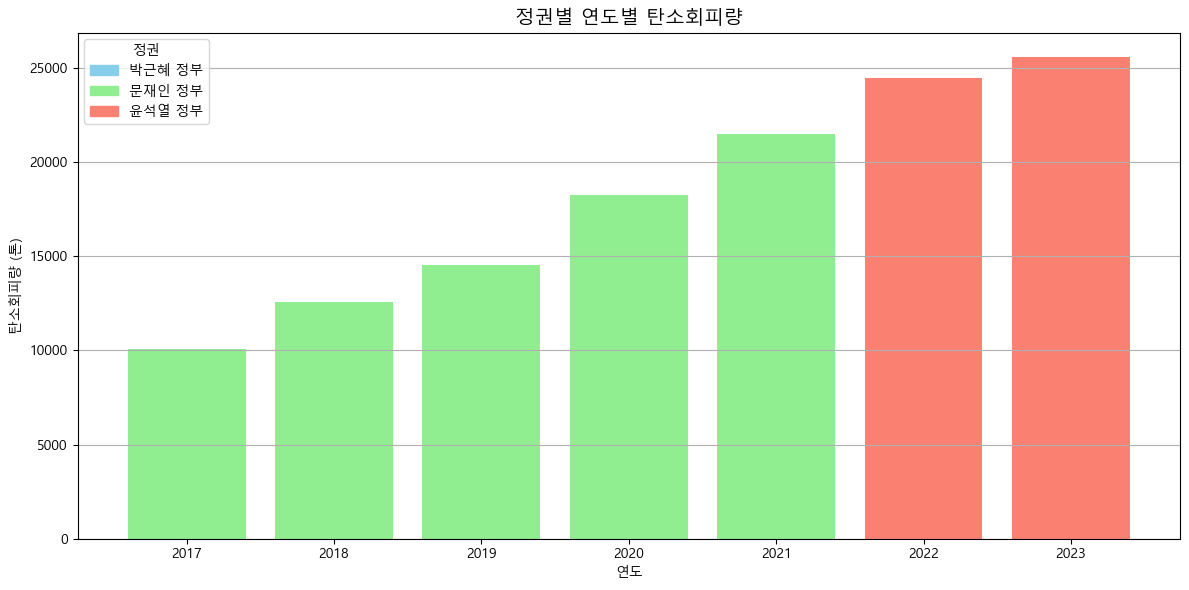

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 정권별 색상 지정 함수
def get_color(year):
    if 2013 <= year <= 2016:
        return 'skyblue'  # 박근혜
    elif 2017 <= year <= 2021:
        return 'lightgreen'  # 문재인
    elif year >= 2022:
        return 'salmon'  # 윤석열
    else:
        return 'gray'

colors = merged['연도'].apply(get_color)

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(merged['연도'], merged['탄소회피량(톤)'], color=colors)

# 범례 추가
legend_patches = [
    mpatches.Patch(color='skyblue', label='박근혜 정부'),
    mpatches.Patch(color='lightgreen', label='문재인 정부'),
    mpatches.Patch(color='salmon', label='윤석열 정부')
]
plt.legend(handles=legend_patches, title='정권')

plt.title('정권별 연도별 탄소회피량', fontsize=14)
plt.xlabel('연도')
plt.ylabel('탄소회피량 (톤)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


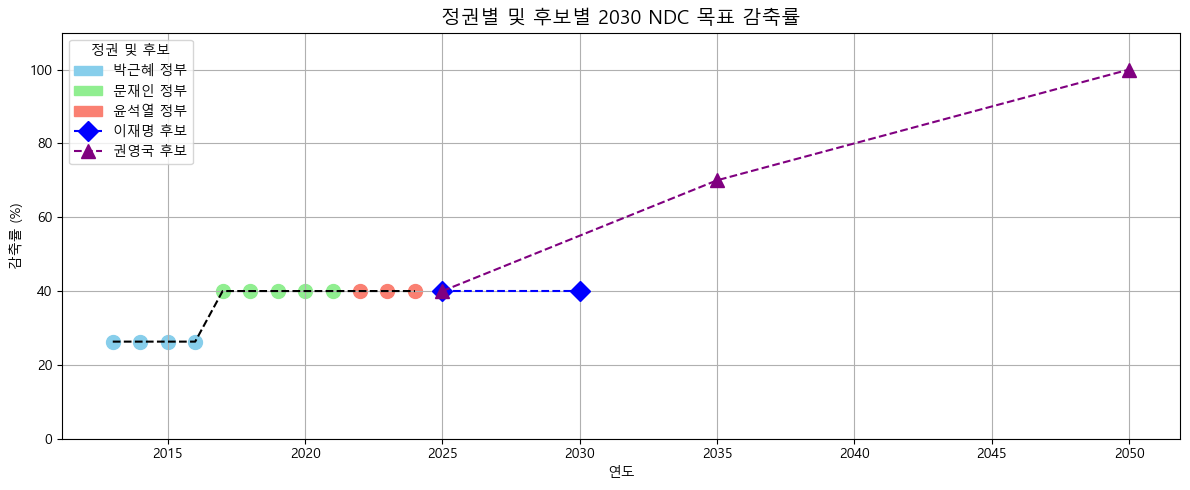

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 정부별 기존 감축률 (2013~2024)
years = np.arange(2013, 2025)
reduction = []
for y in years:
    if y <= 2016:
        reduction.append(26.3)
    elif y <= 2021:
        reduction.append(40.0)
    else:
        reduction.append(40.0)

colors = ['skyblue' if y <= 2016 else 'lightgreen' if y <= 2021 else 'salmon' for y in years]

plt.figure(figsize=(12, 5))

# 정부별 점선 그래프
plt.plot(years, reduction, color='black', linestyle='--')
for x, y_val, c in zip(years, reduction, colors):
    plt.scatter(x, y_val, color=c, s=100)

# 후보별 감축률 (2025년부터)
# 이재명 후보: 2025(현재 40%) → 2030 (40%)
lee_years = np.array([2025, 2030])
lee_reduction = np.array([40, 40])

# 권영국 후보: 2025(현재 40%) → 2035 (70) → 2050 (100)
kwon_years = np.array([2025, 2035, 2050])
kwon_reduction = np.array([40, 70, 100])

# 후보별 점선 그래프
plt.plot(lee_years, lee_reduction, color='blue', linestyle='--', marker='D', markersize=10, label='이재명 후보')
plt.plot(kwon_years, kwon_reduction, color='purple', linestyle='--', marker='^', markersize=10, label='권영국 후보')

# 범례 패치 (정권별)
legend_patches = [
    mpatches.Patch(color='skyblue', label='박근혜 정부'),
    mpatches.Patch(color='lightgreen', label='문재인 정부'),
    mpatches.Patch(color='salmon', label='윤석열 정부'),
]

plt.legend(handles=legend_patches + plt.gca().get_legend_handles_labels()[0], title='정권 및 후보')

plt.title('정권별 및 후보별 2030 NDC 목표 감축률', fontsize=14)
plt.xlabel('연도')
plt.ylabel('감축률 (%)')
plt.ylim(0, 110)
plt.grid(True)
plt.tight_layout()
plt.show()


정책에 따른 탄소회피량 변화

In [14]:
import pandas as pd
import numpy as np

contract = pd.read_csv("../new data/신재생에너지_계약_현황_목록_전처리.csv")
contract = contract.groupby(['연도'])[['용량', '개수']].sum().reset_index()
print(contract)

facility = pd.read_csv("../new data/전력거래_시장참여설비용량_전처리.csv")
facility['기간'] = pd.to_datetime(facility['기간'])
facility['연도'] = facility['기간'].dt.year
facility = facility.rename(columns={'신재생 합계': '신재생설비용량 합계'})
facility = facility.groupby('연도')['신재생설비용량 합계'].sum().reset_index()

# 1. 산업공정 온실가스 배출량: 인덱스가 연도일 경우 int형 변환
indust_emissions.index = indust_emissions.index.astype(int)
indust_emissions = indust_emissions.astype(float)

# 2. renew_gen 연도 컬럼 int형 변환 및 정렬
renew_gen['연도'] = renew_gen['연도'].astype(int)
renew_gen = renew_gen.sort_values('연도')

# 3. power_gen 연도 컬럼 int형 변환
power_gen['연도'] = power_gen['연도'].astype(int)

# 4. merged 데이터프레임 생성
merged = pd.merge(power_gen, renew_gen, on='연도')
merged['RPS_비율'] = (merged['신재생에너지 합계'] / merged['화석포함총발전량']) * 100

# 5. 공통 연도 구하기
years_indust = indust_emissions.index
years_merged = merged['연도']

common_years = np.intersect1d(years_indust, years_merged)
print(f"공통 연도: {common_years}")

# 6. 데이터프레임 생성
data = pd.DataFrame({
    '신재생공급비중': merged.set_index('연도').loc[common_years, '신재생에너지 공급비중'],
    '산업공정배출량': indust_emissions.loc[common_years],
    'RPS_비율': merged.set_index('연도').loc[common_years, 'RPS_비율'] ,
    '탄소회피량': merged.set_index('연도').loc[common_years, '탄소회피량(톤)'] ,
    '계약개수':contract.set_index('연도').loc[common_years, '개수'],
    '계약용량':contract.set_index('연도').loc[common_years, '용량'],
    '신재생설비용량 합계': facility.set_index('연도').loc[common_years, '신재생설비용량 합계']})

data.dropna(inplace=True)
print(data)


      연도          용량     개수
0   2012    70283.47    834
1   2013   172237.92   1821
2   2014   525085.01   5427
3   2015   610038.70   5916
4   2016   439806.73   3574
5   2017   694169.68   5096
6   2018  1360531.16   9773
7   2019  2476543.22  21076
8   2020  2878206.33  26124
9   2021  2354730.55  22196
10  2022  1822792.56  17576
11  2023  2003131.21  22301
12  2024  2354730.55  22196
공통 연도: [2017 2018 2019 2020 2021 2022]
      신재생공급비중  산업공정배출량    RPS_비율         탄소회피량   계약개수        계약용량  신재생설비용량 합계
2017     4.11    127.9  4.294078  10078.061512   5096   694169.68  110389.010
2018     4.99    128.9  5.201072  12584.208064   9773  1360531.16  121765.583
2019     5.81    130.9  6.082560  14520.839936  21076  2476543.22  127402.553
2020     7.44    126.8  7.809984  18284.481024  26124  2878206.33  116603.510
2021     8.29    132.8  8.782344  21478.734632  22196  2354730.55  136115.059
2022     9.22    131.3  9.720721  24498.719576  17576  1822792.56  157077.558


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 상수항 추가
X = add_constant(data[['신재생공급비중', '산업공정배출량', '계약개수', '신재생설비용량 합계']])  

# VIF 계산
vif_data = pd.DataFrame()
vif_data["변수"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# # 상수항 추가
# X = add_constant(data[['신재생공급비중', '산업공정배출량', 'RPS_비율']])  #신재생공급비중과 RPS 비율은 다중공산성 문제 발생 하나만 써야함

# # VIF 계산
# vif_data = pd.DataFrame()
# vif_data["변수"] = X.columns
# vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# print(vif_data)



           변수          VIF
0       const  7769.919193
1     신재생공급비중     9.975768
2     산업공정배출량     2.617791
3        계약개수     3.627504
4  신재생설비용량 합계     8.731077


In [16]:
print(merged)

     연도      화석포함총발전량         총발전량       양수발전  신재생에너지 공급비중  재생에너지 공급비중  \
0  2023  5.880465e+08  624,883,407  3,783,877         9.67        8.50   
1  2022  5.944004e+08  626,448,138  3,715,049         9.22        8.05   
2  2021  5.768095e+08  611,015,325  3,682,932         8.29        7.15   
3  2020  5.521622e+08  579,999,196  3,271,019         7.44        6.41   
4  2019  5.630403e+08  589,199,929  3,458,385         5.81        5.25   
5  2018  5.706465e+08  594,608,598  3,911,035         4.99        4.41   
6  2017  5.535301e+08  578,013,727  4,186,353         4.11        3.64   

   신에너지 공급비중   신재생에너지 합계    재생에너지 합계    신에너지 합계  ...         수력       해양  \
0       1.16  60399865.0  53,146,000  7,253,865  ...  3,718,015  437,567   
1       1.18  57779999.0  50,405,547  7,374,452  ...  3,544,866  423,843   
2       1.14  50657393.0  43,668,518  6,988,875  ...  3,057,210  454,980   
3       1.02  43123776.0  37,202,048  5,921,728  ...  3,879,383  457,263   
4       0.57  34247264.0  3

원본 데이터 크기: 6
증강 데이터 크기: 60
### 상관관계 행렬 (원본 데이터) ###
             산업공정배출량      계약개수  신재생설비용량 합계     탄소회피량
산업공정배출량     1.000000  0.248820    0.741374  0.562501
계약개수        0.248820  1.000000    0.310145  0.650719
신재생설비용량 합계  0.741374  0.310145    1.000000  0.851642
탄소회피량       0.562501  0.650719    0.851642  1.000000


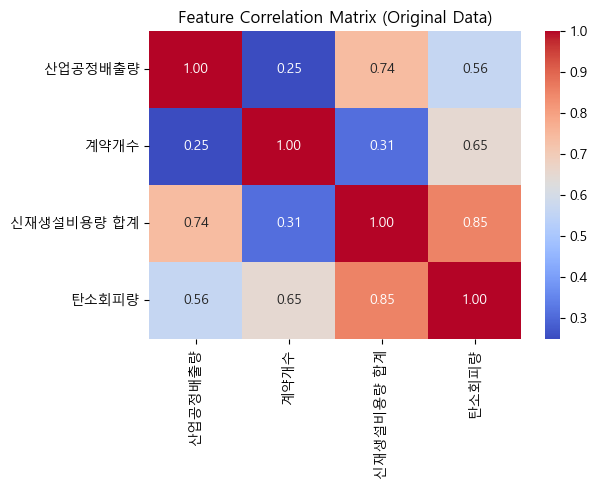


### 3-Fold 교차검증 평가 (Random Forest, 증강 데이터) ###
R² 평균: 0.9882

### Random Forest 회귀 결과 (전체 원본+증강 데이터 기준) ###
R² (전체 데이터): 0.9847


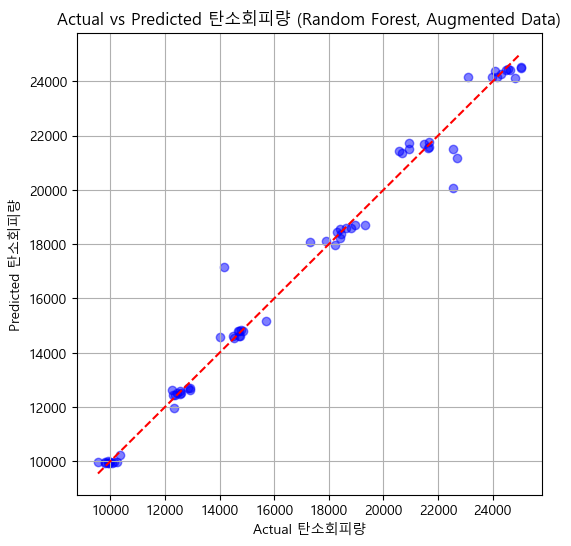

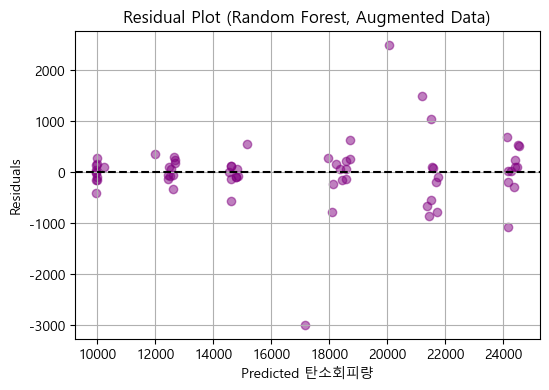

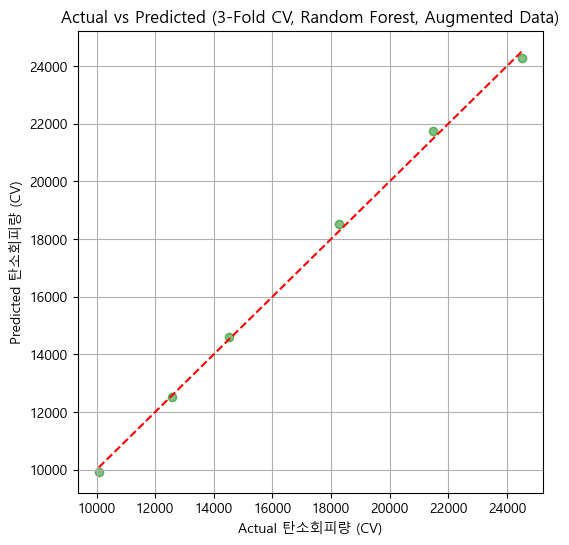

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

data = pd.DataFrame({
    # '신재생공급비중': merged.set_index('연도').loc[common_years, '신재생에너지 공급비중'],
    '산업공정배출량': indust_emissions.loc[common_years],
    '계약개수': contract.set_index('연도').loc[common_years, '개수'],
    '신재생설비용량 합계': facility.set_index('연도').loc[common_years, '신재생설비용량 합계'],
    '탄소회피량': merged.set_index('연도').loc[common_years, '탄소회피량(톤)'] 
})

# 1) 데이터 증강 함수 정의: 기존 데이터에 작은 노이즈 추가해서 샘플 늘리기
def augment_data(df, n_augment=10, noise_level=0.03):
    augmented_list = []
    for _ in range(n_augment):
        noise = np.random.normal(0, noise_level, df.shape)
        augmented = df.values * (1 + noise)
        augmented_df = pd.DataFrame(augmented, columns=df.columns)
        augmented_list.append(augmented_df)
    augmented_data = pd.concat(augmented_list, ignore_index=True)
    return augmented_data

def augment_target(y, noise_level=0.03):
    noise = np.random.normal(0, noise_level, size=len(y))
    return y * (1 + noise)

# 원본 데이터 분리
X_orig = data[['산업공정배출량', '계약개수', '신재생설비용량 합계']]
y_orig = data['탄소회피량']

# X, y 각각 증강
X_aug = augment_data(X_orig, n_augment=10, noise_level=0.03)
y_aug = pd.concat([augment_target(y_orig, noise_level=0.03) for _ in range(10)], ignore_index=True)

print(f"원본 데이터 크기: {X_orig.shape[0]}")
print(f"증강 데이터 크기: {X_aug.shape[0]}")

# 상관관계 행렬 (원본 데이터 기준)
print("### 상관관계 행렬 (원본 데이터) ###")
corr = data.corr()
print(corr)
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix (Original Data)")
plt.show()

# 모델 정의
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    min_samples_leaf=3,
    random_state=42)

# 3-Fold 교차검증 (증강 데이터 기준)
kf = KFold(n_splits=3, shuffle=True, random_state=42)

r2_list = []
rmse_list = []
y_true_all = []
y_pred_all = []

for train_idx, test_idx in kf.split(X_orig):
    # 원본 데이터 기준 train/test 분리
    X_train_orig, X_test = X_orig.iloc[train_idx], X_orig.iloc[test_idx]
    y_train_orig, y_test = y_orig.iloc[train_idx], y_orig.iloc[test_idx]

    # 훈련 데이터 원본 + 증강 데이터 합치기
    X_train = pd.concat([X_train_orig, X_aug], ignore_index=True)
    y_train = pd.concat([y_train_orig, y_aug], ignore_index=True)

    # 모델 학습 및 예측
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    # 평가
    r2 = r2_score(y_test, y_pred)

    r2_list.append(r2)

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred) 

print("\n### 3-Fold 교차검증 평가 (Random Forest, 증강 데이터) ###")
print(f"R² 평균: {np.mean(r2_list):.4f}")

# 전체 원본+증강 데이터로 학습 및 평가
X_all = pd.concat([X_orig, X_aug], ignore_index=True)
y_all = pd.concat([y_orig, y_aug], ignore_index=True)

rf_model.fit(X_all, y_all)
y_pred_full = rf_model.predict(X_all)

print("\n### Random Forest 회귀 결과 (전체 원본+증강 데이터 기준) ###")
r2_full = r2_score(y_all, y_pred_full)
print(f"R² (전체 데이터): {r2_full:.4f}")

# 실제 vs 예측 (전체 증강 데이터 기준)
plt.figure(figsize=(6, 6))
plt.scatter(y_all, y_pred_full, color='blue', alpha=0.5)
plt.plot([y_all.min(), y_all.max()], [y_all.min(), y_all.max()], 'r--')
plt.xlabel('Actual 탄소회피량')
plt.ylabel('Predicted 탄소회피량')
plt.title('Actual vs Predicted 탄소회피량 (Random Forest, Augmented Data)')
plt.grid(True)
plt.show()

# 잔차 플롯
residuals = y_all - y_pred_full
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_full, residuals, color='purple', alpha=0.5)
plt.axhline(0, linestyle='--', color='black')
plt.xlabel('Predicted 탄소회피량')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest, Augmented Data)')
plt.grid(True)
plt.show()

# 교차검증 예측 vs 실제 (모든 Fold 결과 모은 값)
plt.figure(figsize=(6, 6))
plt.scatter(y_true_all, y_pred_all, color='green', alpha=0.5)
plt.plot([min(y_true_all), max(y_true_all)], [min(y_true_all), max(y_true_all)], 'r--')
plt.xlabel('Actual 탄소회피량 (CV)')
plt.ylabel('Predicted 탄소회피량 (CV)')
plt.title('Actual vs Predicted (3-Fold CV, Random Forest, Augmented Data)')
plt.grid(True)
plt.show()

원본 데이터 크기: 6
증강 데이터 크기: 60
### 상관관계 행렬 (원본 데이터) ###
             산업공정배출량      계약개수  신재생설비용량 합계     탄소회피량
산업공정배출량     1.000000  0.248820    0.741374  0.562501
계약개수        0.248820  1.000000    0.310145  0.650719
신재생설비용량 합계  0.741374  0.310145    1.000000  0.851642
탄소회피량       0.562501  0.650719    0.851642  1.000000


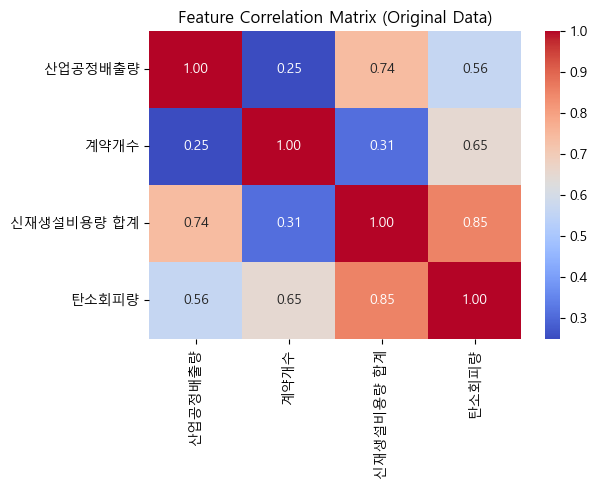


### 3-Fold 교차검증 평가 (앙상블: RF + LR, 증강 데이터) ###
R² 평균: 0.9210


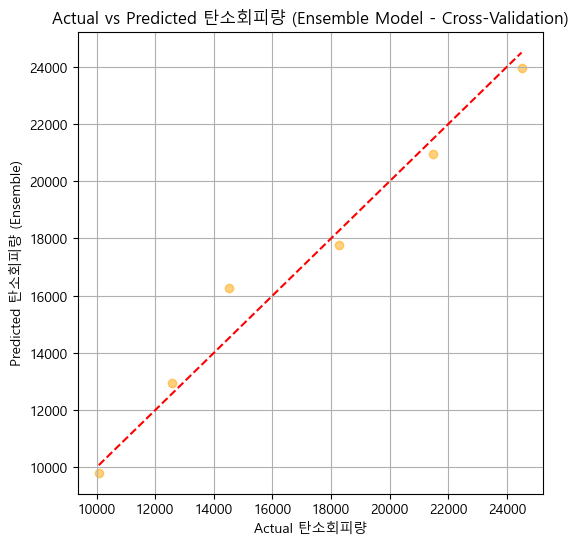

In [49]:
from sklearn.metrics import r2_score, mean_squared_error
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

data = pd.DataFrame({
    # '신재생공급비중': merged.set_index('연도').loc[common_years, '신재생에너지 공급비중'],
    '산업공정배출량': indust_emissions.loc[common_years],
    '계약개수': contract.set_index('연도').loc[common_years, '개수'],
    '신재생설비용량 합계': facility.set_index('연도').loc[common_years, '신재생설비용량 합계'],
    '탄소회피량': merged.set_index('연도').loc[common_years, '탄소회피량(톤)'] 
})

# 1) 데이터 증강 함수 정의: 기존 데이터에 작은 노이즈 추가해서 샘플 늘리기
def augment_data(df, n_augment=10, noise_level=0.03):
    augmented_list = []
    for _ in range(n_augment):
        noise = np.random.normal(0, noise_level, df.shape)
        augmented = df.values * (1 + noise)
        augmented_df = pd.DataFrame(augmented, columns=df.columns)
        augmented_list.append(augmented_df)
    augmented_data = pd.concat(augmented_list, ignore_index=True)
    return augmented_data

def augment_target(y, noise_level=0.03):
    noise = np.random.normal(0, noise_level, size=len(y))
    return y * (1 + noise)

# 원본 데이터 분리
X_orig = data[['산업공정배출량', '계약개수', '신재생설비용량 합계']]
y_orig = data['탄소회피량']

# X, y 각각 증강
X_aug = augment_data(X_orig, n_augment=10, noise_level=0.03)
y_aug = pd.concat([augment_target(y_orig, noise_level=0.03) for _ in range(10)], ignore_index=True)

print(f"원본 데이터 크기: {X_orig.shape[0]}")
print(f"증강 데이터 크기: {X_aug.shape[0]}")

# 상관관계 행렬 (원본 데이터 기준)
print("### 상관관계 행렬 (원본 데이터) ###")
corr = data.corr()
print(corr)
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix (Original Data)")
plt.show()

# 모델 정의
rf_model = RandomForestRegressor(
    n_estimators=100, 
    max_depth=5,       # 트리 깊이 제한
    min_samples_split=5
)

lr_model = Ridge(alpha=1.0)  # L2 규제 적용

# 3-Fold 교차검증 (증강 데이터 기준)
kf = KFold(n_splits=3, shuffle=True, random_state=42)

r2_list_ensemble = []
rmse_list_ensemble = []
y_true_all_ensemble = []
y_pred_all_ensemble = []

for train_idx, test_idx in kf.split(X_orig):
    X_train_orig, X_test = X_orig.iloc[train_idx], X_orig.iloc[test_idx]
    y_train_orig, y_test = y_orig.iloc[train_idx], y_orig.iloc[test_idx]

    # 훈련 데이터에만 증강 데이터 추가
    X_train = pd.concat([X_train_orig, X_aug], ignore_index=True)
    y_train = pd.concat([y_train_orig, y_aug], ignore_index=True)

    # 모델 학습
    rf_model.fit(X_train, y_train)
    lr_model.fit(X_train, y_train)

    # 테스트 세트에 대해 예측
    y_pred_rf = rf_model.predict(X_test)
    y_pred_lr = lr_model.predict(X_test)

    y_pred_ensemble = (y_pred_rf + y_pred_lr) / 2

    # 평가 지표 계산
    r2 = r2_score(y_test, y_pred_ensemble)
    rmse = math.sqrt(mean_squared_error(y_test, y_pred_ensemble))

    r2_list_ensemble.append(r2)
    rmse_list_ensemble.append(rmse)

    y_true_all_ensemble.extend(y_test)
    y_pred_all_ensemble.extend(y_pred_ensemble)

print("\n### 3-Fold 교차검증 평가 (앙상블: RF + LR, 증강 데이터) ###")
print(f"R² 평균: {np.mean(r2_list_ensemble):.4f}")

# 전체 데이터 학습 및 예측은 실제 배포용 모델 생성용으로만 사용
rf_model.fit(pd.concat([X_orig, X_aug], ignore_index=True), pd.concat([y_orig, y_aug], ignore_index=True))
lr_model.fit(pd.concat([X_orig, X_aug], ignore_index=True), pd.concat([y_orig, y_aug], ignore_index=True))

# 시각화 - 교차검증 예측 결과 산점도
plt.figure(figsize=(6,6))
plt.scatter(y_true_all_ensemble, y_pred_all_ensemble, color='orange', alpha=0.5)
plt.plot([min(y_true_all_ensemble), max(y_true_all_ensemble)],
         [min(y_true_all_ensemble), max(y_true_all_ensemble)], 'r--')
plt.xlabel('Actual 탄소회피량')
plt.ylabel('Predicted 탄소회피량 (Ensemble)')
plt.title('Actual vs Predicted 탄소회피량 (Ensemble Model - Cross-Validation)')
plt.grid(True)
plt.show()



[2030년 예측 결과]
신재생설비용량: 188493.07
산업공정배출량: 118.17
계약개수: 21091.20
▶ 앙상블 예측 탄소회피량: 31098.58 톤


c:\Users\gus10\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\gus10\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


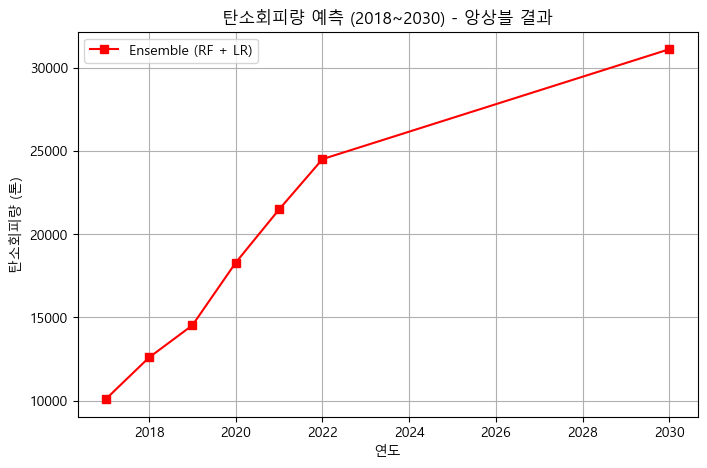

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 2022년 기준값 설정
base_year = 2022

base_supply = data.loc[base_year, '신재생설비용량 합계']
base_industry_emission = data.loc[base_year, '산업공정배출량']
base_contract = data.loc[base_year, '계약개수']

# 훈련 데이터 범위 정보 출력용
supply_min, supply_max = data['신재생설비용량 합계'].min(), data['신재생설비용량 합계'].max()
industry_min, industry_max = data['산업공정배출량'].min(), data['산업공정배출량'].max()
contract_min, contract_max = data['계약개수'].min(), data['계약개수'].max()

# 입력 유효성 검사 함수
def get_float_input(prompt):
    while True:
        try:
            return float(input(prompt))
        except:
            print("숫자를 입력해주세요.")

# 사용자 입력 받기
increase_ratio_supply = get_float_input("신재생 공급비중을 2022 대비 몇 % 증가시킬 계획인가요? (예: 50 입력 시 50% 증가): ")
decrease_ratio_industry = get_float_input("산업공정 배출량을 2022 대비 몇 % 감축할 계획인가요? (예: 20 입력 시 20% 감소): ")

# 입력값 계산
future_supply = base_supply * (1 + increase_ratio_supply / 100)
future_industry_emission = base_industry_emission * (1 - decrease_ratio_industry / 100)
future_contract = base_contract * (1 + increase_ratio_supply / 100)  # 공급비중 증가율과 동일하게 가정

# 앙상블 예측 함수 정의
def ensemble_predict(X):
    pred_rf = rf_model.predict(X)
    lr_model = LinearRegression()
    X_all = data[['산업공정배출량', '계약개수', '신재생설비용량 합계']]
    y_all = data['탄소회피량']
    lr_model.fit(X_all, y_all)
    pred_lr = lr_model.predict(X)
    return (pred_rf + pred_lr) / 2

# 예측
X_future = np.array([[future_industry_emission, future_contract, future_supply]])
future_prediction_ensemble = ensemble_predict(X_future)[0]

print("\n[2030년 예측 결과]")
print(f"신재생설비용량: {future_supply:.2f}")
print(f"산업공정배출량: {future_industry_emission:.2f}")
print(f"계약개수: {future_contract:.2f}")
print(f"▶ 앙상블 예측 탄소회피량: {future_prediction_ensemble:.2f} 톤")

# 앙상블 결과만 시각화
plt.figure(figsize=(8,5))
years = list(data.index) + [2030]
values_ensemble = list(data['탄소회피량']) + [future_prediction_ensemble]

plt.plot(years, values_ensemble, marker='s', linestyle='-', color='red', label='Ensemble (RF + LR)')
plt.title('탄소회피량 예측 (2018~2030) - 앙상블 결과')
plt.xlabel('연도')
plt.ylabel('탄소회피량 (톤)')
plt.grid(True)
plt.legend()
plt.show()
